In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [95]:
def getX(data):
    X = data[['rubrics', 'rating']]
    X_clean = X.join(pd.get_dummies(X['rubrics']))
    X_clean = X_clean.drop(columns = ['rubrics'])
    return X_clean

In [96]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         73995 non-null  uint64 
 1   org_id                          73995 non-null  uint64 
 2   rating                          73995 non-null  float64
 3   ts                              73995 non-null  int64  
 4   user_city                       73995 non-null  object 
 5   org_city                        73995 non-null  object 
 6   average_bill                    45433 non-null  float64
 7   rating_org                      73995 non-null  float64
 8   rubrics                         73995 non-null  object 
 9   food_delivery                   73995 non-null  int64  
 10  breakfast                       73995 non-null  int64  
 11  takeaway                        73995 non-null  int64  
 12  summer_terrace                  

In [97]:
X = getX(df)
y = df['rating_org']

In [98]:
def print_corr(c):
    plt.figure(figsize=(20, 15))
    sns.heatmap(c, cmap='coolwarm', annot=True)
    plt.show()

C:\Users\marse\AppData\Local\Temp\ipykernel_15180\1344109763.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


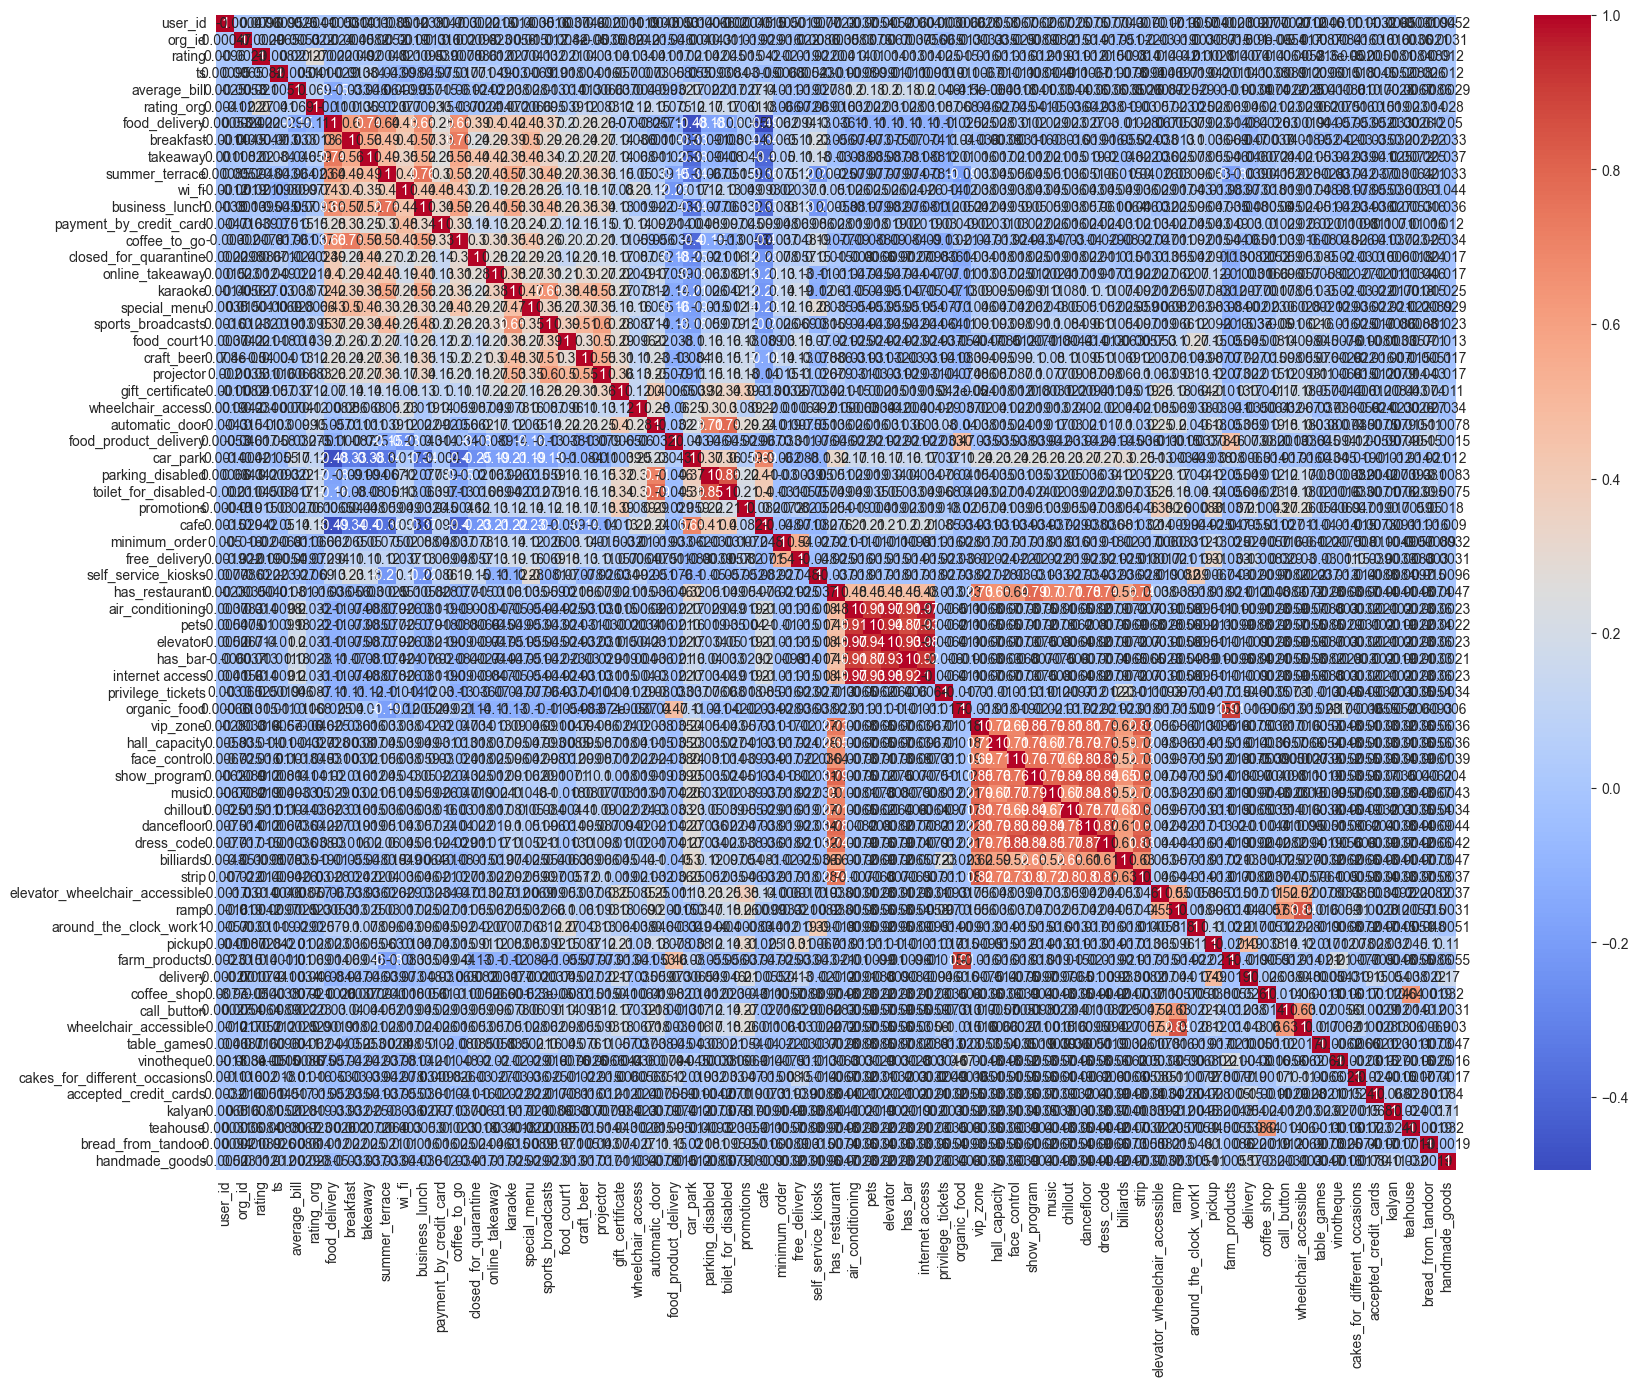

In [99]:
# df = df.join(pd.get_dummies(df['rubrics']))
correlation = df.corr()
print_corr(correlation)

In [100]:
def most_corr(data):
  for column in data.columns:
    x = correlation[correlation[column].between(0.5, 1,  inclusive="neither")].index
    if len(x) > 0:
      print(column, ', '.join(x), sep=', ')

In [101]:
most_corr(correlation)

food_delivery, breakfast, takeaway, summer_terrace, business_lunch, coffee_to_go
breakfast, food_delivery, takeaway, business_lunch, coffee_to_go
takeaway, food_delivery, breakfast, business_lunch, coffee_to_go
summer_terrace, food_delivery, business_lunch, coffee_to_go, karaoke
business_lunch, food_delivery, breakfast, takeaway, summer_terrace, coffee_to_go, karaoke
coffee_to_go, food_delivery, breakfast, takeaway, summer_terrace, business_lunch
karaoke, summer_terrace, business_lunch, sports_broadcasts, projector
sports_broadcasts, karaoke, craft_beer, projector
food_court1, projector
craft_beer, sports_broadcasts, projector
projector, karaoke, sports_broadcasts, food_court1, craft_beer
automatic_door, parking_disabled, toilet_for_disabled
car_park, cafe
parking_disabled, automatic_door, toilet_for_disabled
toilet_for_disabled, automatic_door, parking_disabled
cafe, car_park
minimum_order, free_delivery
free_delivery, minimum_order
has_restaurant, vip_zone, hall_capacity, face_contro

In [102]:
corr_data = {
            # "cafe": 'business_lunch, food_delivery, breakfast, takeaway, summer_terrace, coffee_to_go',
            "bar": 'projector, karaoke, sports_broadcasts, food_court1, craft_beer',
            "disability": 'automatic_door, parking_disabled, toilet_for_disabled',
            "visit": "car_park, cafe",
             # "pay" : 'minimum_order, free_delivery',
             # "comfort": 'air_conditioning, pets, elevator, has_bar, internet access',
             # "restaurant": 'vip_zone, has_restaurant, hall_capacity, face_control, show_program, music, chillout, dancefloor, dress_code, billiards, strip',
             # 'disability2': 'elevator_wheelchair_accessible, ramp, call_button, wheelchair_accessible',
             # 'good_food' : 'organic_food, farm_products',
             # 'coffee': 'coffee_shop, teahouse'
}

In [103]:
def get_new_df(df):
  new_df = pd.DataFrame()
  for i in corr_data:
    new_df[i] = df[corr_data[i].split(', ')].max(axis=1)
  return new_df

In [104]:
new_df = get_new_df(df)


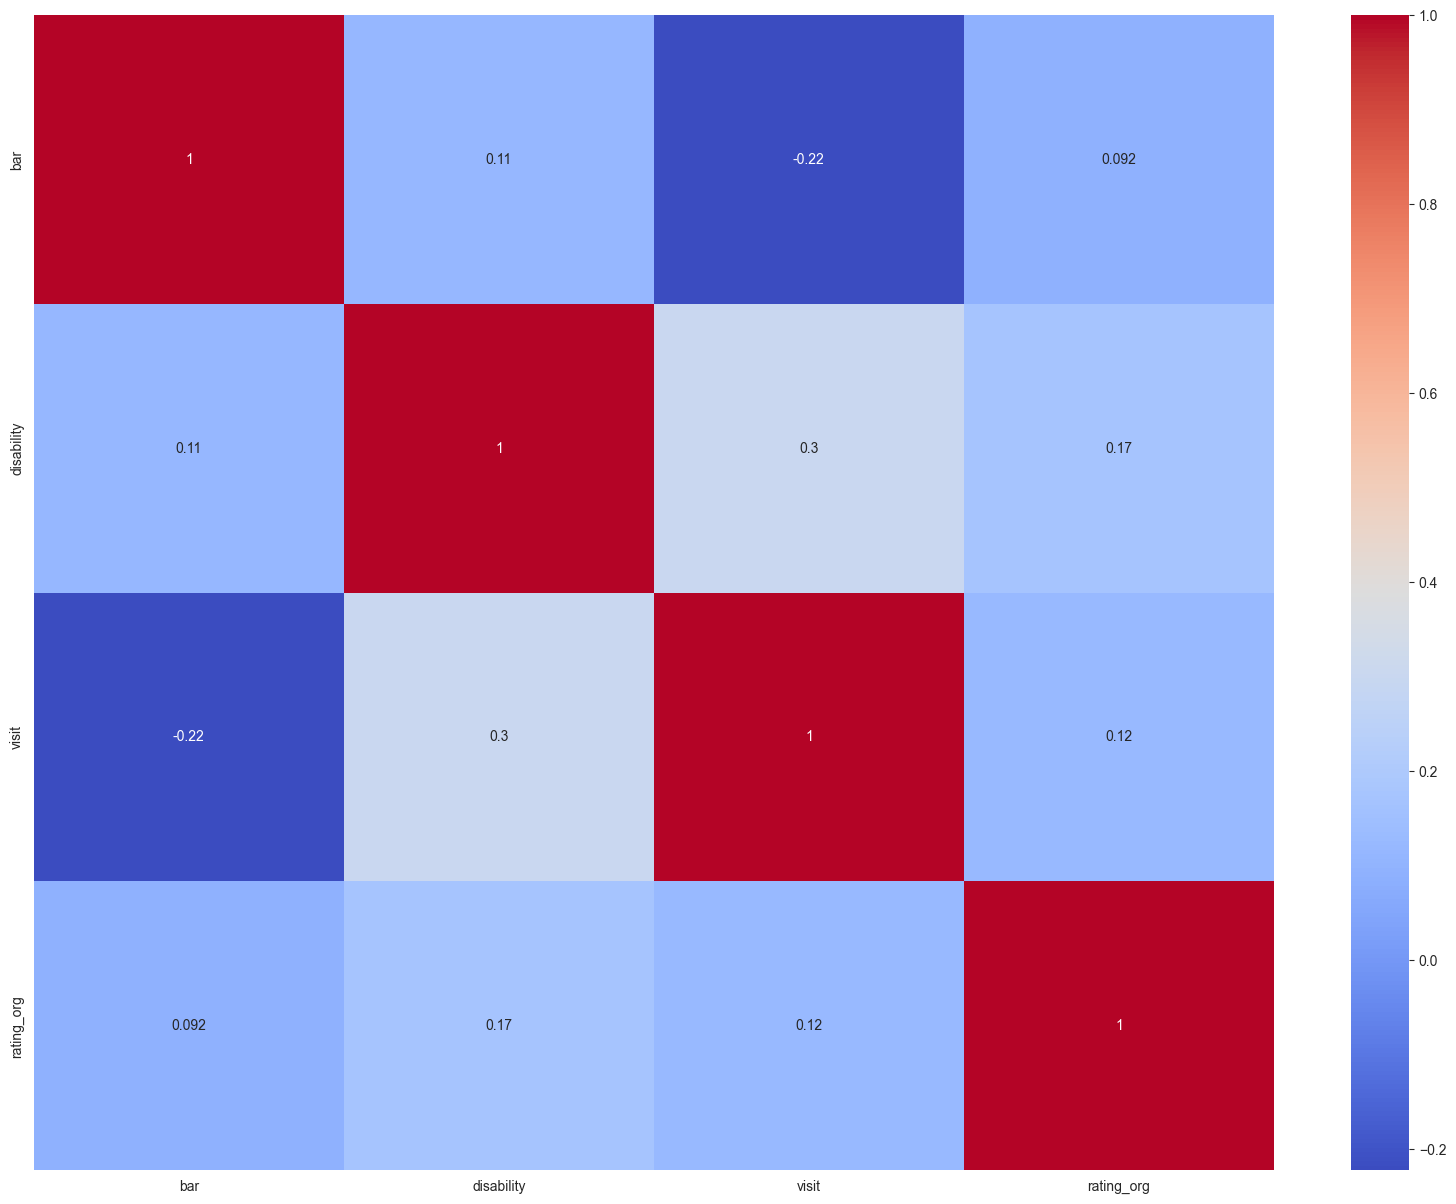

In [105]:
new_c = new_df.join(y).corr()
print_corr(new_c)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=42)

In [107]:
neigh = KNeighborsRegressor(n_neighbors=1000, leaf_size = 256)
neigh.fit(new_df, y)

KNeighborsRegressor(leaf_size=256, n_neighbors=1000)

In [108]:
# y_predicted = neigh.predict(X_test)
# mean_absolute_percentage_error(y_test, y_predicted)

In [109]:
def tuning():
  #List Hyperparameters that we want to tune.
  leaf_size = [16, 32, 64, 128, 256]
  n_neighbors = [10, 50, 100, 200, 500, 1000]
  p=[1]
  #Convert to dictionary
  hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
  #Create new KNN object
  knn_2 = KNeighborsRegressor()
  #Use GridSearch
  clf = GridSearchCV(knn_2, hyperparameters, cv=5)
  #Fit the model
  best_model = clf.fit(X_train,y_train)
  #Print The value of best Hyperparameters
  print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
  print('Best p:', best_model.best_estimator_.get_params()['p'])
  print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [110]:
# tuning()
# Best leaf_size: 256
# Best p: 1
# Best n_neighbors: 1000

In [111]:
# y_result[['id', 'rating_org']].to_csv('prediction.csv', index=False)

In [112]:
test = pd.read_csv("test_x.csv")
new_test = get_new_df(test)
y_test = neigh.predict(new_test)

In [113]:
# y_predicted = neigh.predict(X)
d = {'id' : new_test.index, 'rating_org': y_test}
y_df = pd.DataFrame(data=d)
y_df.to_csv('prediction.csv', index=False)

In [114]:
y_df.sample(10)

,id,rating_org
8548,8548,4.252317
4675,4675,4.387294
24488,24488,4.252317
13280,13280,4.539210
23909,23909,4.342096
12552,12552,4.342096
5946,5946,4.252317
10121,10121,4.342096
8309,8309,4.539210
8948,8948,4.252317
